Tomo cada data file de puntos, lo convierto en un geodataframe, me quedo solo con aquellos que caen en los cuadros

In [1]:
import pandas as pd
import geopandas as gpd
import os
import gzip
import csv
from shapely.geometry import Point
import numpy as np

In [2]:
# Leyendo los shapes de limite de la capital y las subareas generadas a mano
subareas = gpd.read_file("data/areastest.shp")
base=subareas.plot(markersize=6, color="blue")
limit= gpd.read_file("data/limitetest.shp")
limit.plot(ax=base, color='red', markersize=5)

In [3]:
def df_to_gdf(input_df):
    """
    Convert a DataFrame with longitude and latitude columns
    to a GeoDataFrame.
    """
    df = input_df.copy()
    geometry = [Point(xy) for xy in zip(df.lon, df.lat)]
    return gpd.GeoDataFrame(df, crs=4326, geometry=geometry)


listoffiles=os.listdir("data/properati")

listofgdfstoappend=[]

for file in listoffiles:
    """
    I will collect only the points that fall into the previously drawn boxes
    """

    print('reading file '+file)
    df = pd.read_csv('data/properati/'+file, compression='gzip')
    
    df.columns

    gdf=df_to_gdf(df)
    gdf.crs = {'init' :'epsg:4326'}
    pointsInAreas = gpd.sjoin(gdf, subareas, op='within')
    pointsInAreas['date']=file
    #pointsInAreas2.plot()
    #pointsInAreas2.columns
    listofgdfstoappend.append(pointsInAreas)

#finally concat to append the dataframes
rdf = gpd.GeoDataFrame( pd.concat( listofgdfstoappend, ignore_index=True) )
rdf.shape
#rdf.plot()
rdf.plot(ax=base, color='green', markersize=5)
rdf['date'].shape

reading file 2016-01.gz


C:\ProgramData\Miniconda3\lib\site-packages\numpy\lib\function_base.py:2831: RuntimeWarning: invalid value encountered in ? (vectorized)
  outputs = ufunc(*inputs)


reading file 2016-02.gz
reading file 2016-03.gz
reading file 2016-04.gz
reading file 2016-05.gz
reading file 2016-06.gz
reading file 2016-07.gz
reading file 2016-08.gz
reading file 2016-09.gz
reading file 2016-10.gz
reading file 2016-11.gz
reading file 2016-12.gz
reading file 2017-02.gz
reading file 2017-03.gz
reading file 2017-04.gz
reading file 2017-05.gz
reading file 2017-06.gz
reading file 2017-07.gz
reading file 2017-08.gz
reading file 2017-09.gz
reading file 2017-10.gz
reading file 2017-11.gz
reading file 2017-12.gz
reading file 2018-01.gz
reading file 2018-02.gz


(7675,)

<Figure size 432x288 with 0 Axes>

Ploteando Resultados

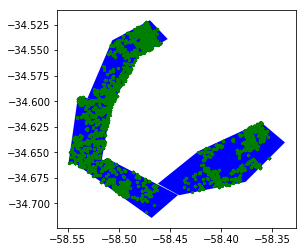

In [4]:
base=subareas.plot(markersize=6, color="blue")
rdf.plot(ax=base, color='green', markersize=5)

Defino una funcion para computar y añadir distancias de puntos al limite de CAP FED

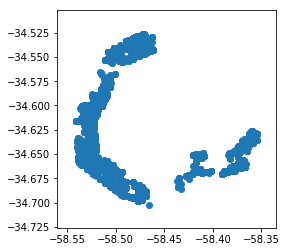

In [5]:
def add_distances_to_line(pointsgpd, linesgpd): #mi funcion para distancias
# I need to work specifically with the GeoSeries component of the Geopandas. Notice that I use the .geometry method and not the 'geometry' column of the gpd 
    dfpoints=pointsgpd.geometry
    geolimit=linesgpd.geometry

    #one point to one line 
    #dfpoints[0].distance(limit.geometry[0]) #este funciona OJO la linea no es una sola sino son varias

    #print(dfpoints.shape[0]) #number of points

    min_dist = np.empty(dfpoints.shape[0]) # I create a numpy array to store distances

    for i, point in enumerate(dfpoints):
        #print(i,point)
        min_dist[i] =np.min([point.distance(line) for line in linesgpd.geometry])  #choose the minimum distance among lines

    
    pointsgpd['min_dist_to_lines'] = min_dist
    #points['min_dist_to_lines']
    
    return pointsgpd

rdf=add_distances_to_line(rdf, limit)

#Plot results

rdf.loc[rdf['min_dist_to_lines'] <0.01].plot()

Exportando data a un csv

In [6]:
dftoexport = pd.DataFrame(rdf)
dftoexport.to_csv('puntos201618.csv', encoding='utf-8', index=False)